In [13]:
# Dependencies
import numpy as np
import pandas as pd
import tweepy
import time
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [14]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [15]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [16]:
# Extract all hashtags from tweets directed to the account
my_username = "@Isa_EscRiv"

In [17]:
# Search for most recent 500 tweets directed to the account
public_tweets = api.search(my_username, count=500, result_type="recent")

In [18]:
# Search for most recent tweet directed to the account

for my_tweet in public_tweets["statuses"]:

    # Print tweet in JSON
    print(json.dumps(my_tweet, sort_keys=True, indent=4, separators=(',', ': ')))


{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Apr 05 16:50:21 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 979172239403708416,
                "id_str": "979172239403708416",
                "indices": [
                    11,
                    22
                ],
                "name": "Isabel Escobar",
                "screen_name": "Isa_EscRiv"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 981937092992225283,
    "id_str": "981937092992225283",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "metadata": {
        "iso_language_code": "en",
        "result_type": "recent"
    },
    "place": n

In [19]:
print('@' + screen_name)

@929_grace


In [25]:
screen = '@' + screen_name

In [21]:
#Sentiment Analysis
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()




In [26]:
# Target Account
target_user = screen

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1

In [27]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.4199,Thu Apr 05 16:50:21 +0000 2018,0.417,0.0,0.583,1
1,0.4199,Thu Apr 05 16:50:21 +0000 2018,0.417,0.0,0.583,2
2,0.4199,Thu Apr 05 04:50:14 +0000 2018,0.417,0.0,0.583,3
3,0.4199,Thu Apr 05 04:50:14 +0000 2018,0.417,0.0,0.583,4
4,0.4199,Thu Apr 05 04:38:46 +0000 2018,0.264,0.0,0.736,5


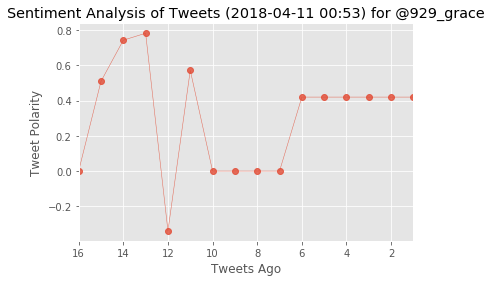

In [28]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()